# PJ1 Aggregate 2 (Official)

In [1]:
import load_stl
import meshio
import os.path
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from scipy.special import ellipkinc, ellipeinc
from importlib import reload
import indicators_calculation as ic

## 1) Load aggregate

In [2]:
load_stl.load_aggregate('C:\\Users\\dschmidt\\Documents\\Cuttings\\PJ1_Agg2_Official.stl')

Number of points: 644263
Number of elements:
  triangle: 1296480

In [2]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PJ1_Agg2_Official.vtk')
reader.Update()

aggregate_coord = np.array(reader.GetOutput().GetPoints().GetData())
print(aggregate_coord)
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

[[0.016658 0.010728 0.014731]
 [0.016652 0.010733 0.014731]
 [0.016658 0.010733 0.01473 ]
 ...
 [0.01718  0.005799 0.020874]
 [0.017198 0.005799 0.020873]
 [0.017216 0.005799 0.020873]]


In [3]:
print(aggregate_coord.shape)

(644263, 3)


## 2) Bounding box

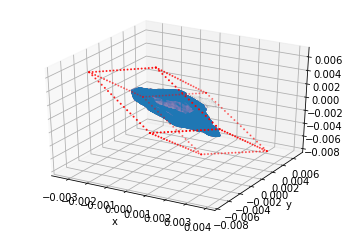

In [11]:
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [6]:
print(bbox_aggregate)

{'angles': array([-0.72797683,  0.6125091 ]), 'volume': 3.182855037902809e-07}


## 3) Bounding ellipsoid

In [4]:
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord, tol=1e-12)

In [14]:
print(bounding_ellipsoid)

{'volume': 5.234048582643647e-07, 'a': 0.0026539863361509657, 'b': 0.008590111891734215, 'c': 0.005480896950441617, 'bbox': {'angles': array([-0.72797683,  0.6125091 ]), 'volume': 3.182855037902809e-07}}


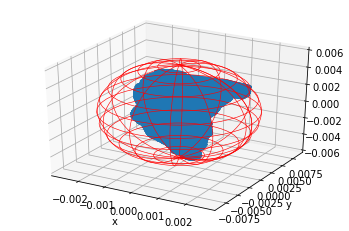

In [24]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid, 0.001)

## 4) Included ellipsoid

In [5]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-13)

In [20]:
print(included_ellipsoid)

{'volume': 7.505654505968514e-10, 'a': 0.0002992831658759776, 'b': 0.0009686846714951812, 'c': 0.0006180665547612114, 'bbox': {'angles': array([-0.72797683,  0.6125091 ]), 'volume': 3.182855037902809e-07}}


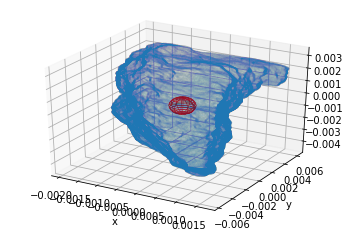

In [25]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid, 0.0001)

## 5) Middle ellipsoid

In [6]:
middle_ellipsoid = bf.mid_ellipsoid(bounding_ellipsoid, included_ellipsoid)

In [7]:
print(middle_ellipsoid)

{'volume': 9.014900885777019e-08, 'a': 0.0014766347510134716, 'b': 0.004779398281614698, 'c': 0.003049481752601414}


## 6) Indicators

In [23]:
reload(bf)
reload(ic)
reload(plot)

<module 'plot' from 'C:\\Users\\dschmidt\\Documents\\Cuttings\\plot.py'>

In [8]:
distance = ic.roughness_distance(aggregate_coord, middle_ellipsoid)

In [9]:
tomo_surface = 0.000138
tomo_volume = 7.9109547357348e-008 

Aggregate standard sphericity =  0.6457894876386012
Bounding box and ellispoids ratios :
a/b = 0.3089582964227449
a/c = 0.4842248194316304
b/c = 1.5672821381985802
a^2/bc = 0.1496052752972078
Bounding ellipsoid surface / Included ellipsoid surface = 78.63805923111357
Aggregate tomographed surface / Bounding ellipsoid surface = 0.36533954399951774
Aggregate tomographed surface / Middle ellipsoid surface = 1.1801789871692592
Aggregate tomographed surface / Included ellipsoid surface = 28.729592700502103
Roughness map (middle ellipsoid): 
Mean absolute roughness distance = 0.001062000334856165
 
data min max
theta 0.0004681189647226173 6.282990068888203
phi 0.003169783158849761 3.139860576972361
alpha 0.00014462924741990687 6.283124986688991
beta 0.0028143952545594307 3.1396923628298077
distance -0.003927105250272684 0.003073389522670875


C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in less
  zi[(zi<zmin) | (zi>zmax)] = None
C:\Users\dschmidt\Documents\Cuttings\plot.py:221: RuntimeWarning: invalid value encountered in greater
  zi[(zi<zmin) | (zi>zmax)] = None


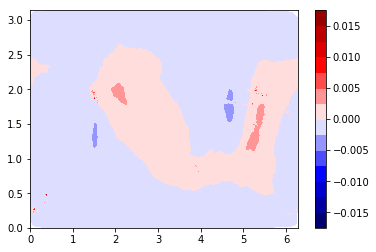

{'aggregate_standard_sphericity': 0.6457894876386012,
 'a/b': 0.3089582964227449,
 'a/c': 0.4842248194316304,
 'b/c': 1.5672821381985802,
 'a^2/bc': 0.1496052752972078,
 'bounding_ellipsoid_ surface/included_ellipsoid_surface': 78.63805923111357,
 'aggregate_tomographed_surface/bounding_ellipsoid_surface': 0.36533954399951774,
 'aggregate_tomographed_surface/middle_ellipsoid_surface': 1.1801789871692592,
 'aggregate_tomographed_surface/included_ellipsoid_surface': 28.729592700502103,
 'roughness_distance': array([[ 2.02461002e+00,  2.77578605e+00, -1.63335350e-04,
          2.57696624e+00,  2.75205896e+00],
        [ 2.02771965e+00,  2.77345834e+00, -1.58617290e-04,
          2.58051917e+00,  2.74815856e+00],
        [ 2.02247496e+00,  2.77444308e+00, -1.61830941e-04,
          2.57450983e+00,  2.75164232e+00],
        ...,
        [ 4.73081140e+00,  8.56945986e-01,  1.55869712e-03,
          4.77195271e+00,  6.35614442e-01],
        [ 4.73529792e+00,  8.57134328e-01,  1.55916806e-03,


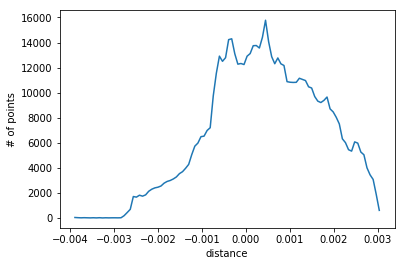

In [10]:
ic.indicators(aggregate_coord, bounding_ellipsoid, middle_ellipsoid, included_ellipsoid,
              tomo_surface, tomo_volume, scale_maxvalue=0.018)